# Ejercicio 2.2: Manejo de Valores Atípicos (Ejemplo)

En este ejercicio, aprenderás a detectar y manejar valores atípicos en un dataset utilizando el método del rango intercuartílico (IQR). También visualizarás los valores atípicos mediante un boxplot.

Tareas:
1. Carga el dataset de Titanic desde una URL en un DataFrame.
2. Calcula el rango intercuartílico (IQR) para la columna `Fare`.
3. Filtra los datos para incluir únicamente valores dentro del rango permitido según el IQR.
4. Visualiza los valores atípicos en la columna `Fare` utilizando un boxplot.

In [ ]:
# Paso 1: Importar las librerías necesarias
# -------------------------------------------
# Asegúrate de tener instaladas las librerías pandas, numpy y matplotlib.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Paso 2: Cargar el dataset desde la URL
# -------------------------------------------
# Usa la función `read_csv` para cargar el dataset de Titanic.

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Muestra las primeras filas del dataset para familiarizarte con su estructura
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [ ]:
# Paso 3: Calcular el IQR para la columna `Fare`
# -------------------------------------------
# Obtén el primer cuartil (Q1), el tercer cuartil (Q3) y calcula el rango intercuartílico (IQR).

Q1 = df["Fare"].quantile(0.25)  # Primer cuartil
Q3 = df["Fare"].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

print("\nEstadísticas de Fare:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


Estadísticas de Fare:
Q1: 7.9104, Q3: 31.0, IQR: 23.0896


In [ ]:
# Paso 4: Filtrar valores dentro del rango permitido
# -------------------------------------------
# Aplica la fórmula para filtrar los valores dentro del rango permitido basado en el IQR.

filtered_df = df[(df["Fare"] >= Q1 - 1.5 * IQR) & (df["Fare"] <= Q3 + 1.5 * IQR)]

# Muestra las primeras filas del DataFrame filtrado
print("\nFilas después de filtrar valores atípicos en Fare:")
print(filtered_df.head())



Filas después de filtrar valores atípicos en Fare:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male   NaN      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  
5            330877   8.45

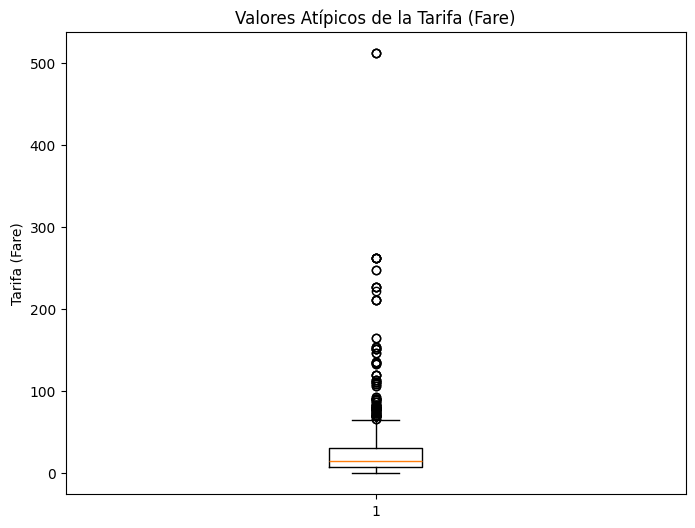

In [ ]:
# Paso 5: Visualizar los valores atípicos con un boxplot
# -------------------------------------------
# Usa Matplotlib para crear un boxplot de la columna `Fare`.

plt.figure(figsize=(8, 6))
plt.boxplot(df["Fare"].dropna())
plt.title("Valores Atípicos de la Tarifa (Fare)")
plt.ylabel("Tarifa (Fare)")
plt.show()
